In [ ]:
!pip install qutip

##Two-Level System
Fisher et al.


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
300


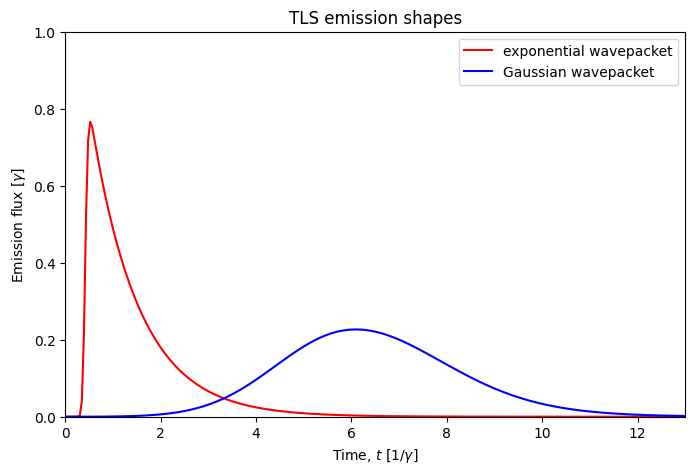

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Options, qutrit_basis, dag, fock, about, basis, destroy, mesolve, qeye, sigmaz, tensor

n = 300
gamma = 1 #decay constant
tlist = np.linspace(0,13,n) #lifetime of system

#exponential wavepacket
sigma_e = 0.060 #Pulse length
omega_max_e = 16.09 #Driving strength
t_i_e = 0.405 #Centre of the Gaussian pulse (offset)
omega_e = omega_max_e/2*np.exp(-(tlist - t_i_e)**2 / (2 * sigma_e ** 2))

#Gaussian wavepacket
sigma_g = 2 #Pulse length
omega_max_g = 0.7056 #Driving strength
t_i_g = 5 #Centre of the Gaussian pulse (offset)
omega_g = omega_max_g/2*np.exp(-(tlist - t_i_g)**2 / (2 * sigma_g ** 2))

#initial state
psi0 = fock(2,0) #ground state = [1;0]

#operators
sm = destroy(2)
n = [sm.dag()*sm]

#Hamiltonian
H_I = sm + sm.dag() #Hamiltonian Operators
print(H_I)
H_e = [[H_I, omega_e]] #exponential wavepacket
H_G = [[H_I, omega_g]] #gaussian wavepacket

#Collapse Operators
c_ops = [np.sqrt(gamma)*sm]

#Solve
n_e = mesolve(H_e, psi0, tlist, c_ops, n).expect[0]
print(len(n_e))
n_G = mesolve(H_G, psi0, tlist, c_ops, n).expect[0]

#Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, n_e, 'r', label="exponential wavepacket")
ax.plot(tlist, n_G, 'b', label="Gaussian wavepacket")
ax.legend()
ax.set_xlim(0, 13)
ax.set_ylim(0, 1)
ax.set_xlabel('Time, $t$ [$1/\gamma$]')
ax.set_ylabel('Emission flux [$\gamma$]')
ax.set_title('TLS emission shapes');

###code alterations

[0.0001171875, 0.00015352220095292404, 0.00019992436975416013, 0.00025880039347726596, 0.0003330188203097187, 0.0004259682922839856, 0.0005416146670795892, 0.000684554783499304, 0.0008600637660435644, 0.001074132216243228, 0.0013334891382090852, 0.0016456060359456605, 0.002018677348285736, 0.0024615723048029385, 0.002983753443818614, 0.003595157479110488, 0.00430603497475129, 0.005126746414713353, 0.00606751374526203, 0.007138128311846479, 0.00834761827098763, 0.009703880966639012, 0.011213288326270145, 0.012880275933969848, 0.014706928932180537, 0.016692580128873615, 0.0188334374727679, 0.02112225923688686, 0.023548095665272783, 0.026096115360324884, 0.028747533229229842, 0.031479654327765776, 0.03426604445803614, 0.03707683397787869, 0.039879156114445036, 0.04263771535621229, 0.04531547549433291, 0.047874450904794905, 0.050276579040144126, 0.05248464716944652, 0.05446324248443792, 0.05617969205336668, 0.05760495796420289, 0.05871445348789121, 0.05948874824974068, 0.05991413416343123,

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

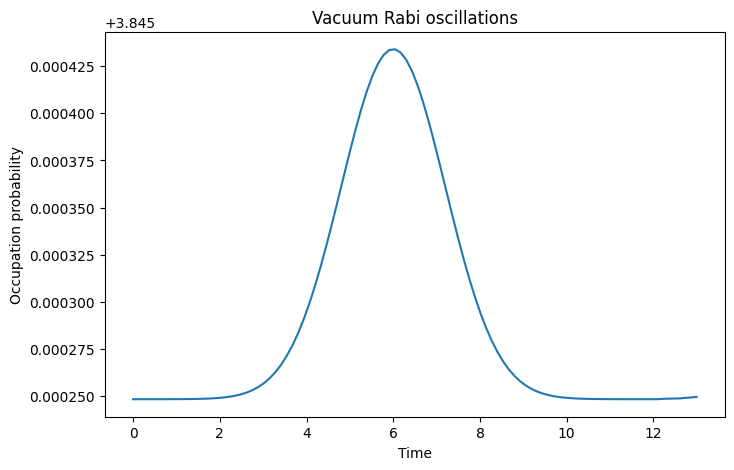

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Options, qutrit_basis, dag, fock, about, basis, destroy, mesolve, qeye, sigmaz, tensor
import scipy.integrate as integrate

#Parameters and Values
n = 100
t_list = np.linspace(0, 13, n) #Lifetime of the system
#Frequency
omega_max = 0.060 #Maximum intensity of the laser pulse
t_i = 6 #Centre of the Gaussian pulse (offset) (s)
sigma = 2 #Pulse Length (s)
omega = []
for time in range(0,len(t_list)):
  omega_inst = omega_max*np.exp(-(np.log(2)*((t_list[time]-t_i)**2))/(sigma**2) ) #Rabi frequency
  omega.append(omega_inst)
print(omega)

#Collapse Operators
#scale factors
gamma_x = 1 #exiton decay constant (THz)
gamma_I0 = 0 #Amplitude of intensity-dependent dephasing rate
n_p = 2
delta_x = 2*np.pi #transition state-exciton seperation (THz)
delta_b = 0 #detuning due to laser

#Initial State
psi0 = fock(2,1)

#Hamiltonians Operators
#Object builder function
def one_at(pos=(0,0), N=2):
    arr = np.zeros((N, N))
    arr[pos] = 1
    return qt.Qobj(arr)

Sgx = one_at((1,0),2)

#Sxb = one_at((1,0),3)

Sxg = one_at((0,1),2)

#Sbx = one_at((0,1),3)

Sgg = one_at((1,1),2)

Sxx = one_at((1,1),2)

#Sbb = one_at((0,0),3)

#Collapse Operators
#L1 = (gamma_b/2)*Sbx #biex-ex spontaneous decay
L2 = (gamma_x/2)*Sxg #ex-gnd spontaneous decay
#L3 = []
L4 = []

# for i in (range(0,n)):
#   val3 = ((gamma_I0*((omega[i]/omega_max)**n_p))/2)*(Sbb-Sxx) #biex-ex dephasing
#   L3.append(val3)

for i in (range(0,n)):
  val4 = ((gamma_I0*((omega[i]/omega_max)**n_p))/2)*(Sxx-Sgg) #ex-gnd dephasing
  L4.append(val4)

#Evolution Operators
e_ops_ex = Sxg.dag()*Sxg
#e_ops_biex = Sbx.dag()*Sbx

#Hamiltonian
H_list = []
for i in range(0,n):
  H = (((omega[i])/2)*(Sgx+Sxg))+((delta_x-delta_b)*Sxx)
  H_list.append(H)

#Evolution
master_output = []
int_output = []

for val in range(0,len(L4)):
  output = mesolve(H_list[val], psi0, t_list, [L2,L4[val]], e_ops_ex, options=Options(nsteps=20000))
  ex = output.expect[0]
  master_output.append(ex)

for vals in range(0,len(master_output)):
   integration = np.trapz(master_output[vals], t_list)
   int_output.append(integration)

#plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t_list, int_output)
#ax.set_xlim(0, 4)
#ax.set_ylim(0, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')

##Three-Level System

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Options, qutrit_basis, dag, fock, about, basis, destroy, mesolve, qeye, sigmaz, tensor

#Parameters and Values
#scale factors
gamma_b = 1 #biexciton decay constant (THz)
gamma_x = 1 #exiton decay constant (THz)
gamma_I0 = 0.05 #Amplitude of intensity-dependent dephasing rate
n = 50
t_list = np.linspace(0.01, 40, n) #Lifetime of the system

#Frequency
omega_max = np.linspace(0.0001, 0.04, n) #Maximum intensity of the laser pulse
t_i = 16 #Centre of the Gaussian pulse (offset) (ns)
sigma = 5 #Pulse Length (ns)
omega_list = [] #convert to numpy array?

for freq in range(0,n):
  omega = omega_max[freq]*np.exp(-(np.log(2)*((t_list-t_i)**2))/(sigma**2) ) #Rabi frequency
  omega_list.append(omega)

#Collapse Operators
#scale factors
n_p = 2
delta_x = 2*np.pi*0.335 #transition state-exciton seperation (THz)
delta_b = 0 #detuning due to laser

#Initial State
gnd = fock(3,0)
ex = fock(3,1)
biex = fock(3,2)

#Hamiltonians Operators

Sxg = ex*gnd.dag() #x -> g

Sbx = biex*ex.dag() # b -> x

Sgx = gnd*ex.dag() # g -> x

Sxb = ex*biex.dag() # x -> b

Sgg = gnd*gnd.dag()

Sxx = ex*ex.dag()

Sbb = biex*biex.dag()

#Collapse Operators
L1 = (gamma_b/2)*Sbx #biex-ex spontaneous decay
L2 = (gamma_x/2)*Sxg #ex-gnd spontaneous decay
L3 = []
L4 = []

for i in (range(0,n)):
  omega_working = omega_list[i]
  holder3 = []
  holder4 = []
  for j in (range(0,n)):
    coeff = ((gamma_I0*((omega_working[j]/omega_max[i])**n_p))/2)
    val3 = coeff*(Sbb-Sxx) #biex-ex dephasing
    val4 = coeff*(Sxx-Sgg) #ex-gnd dephasing
    holder3.append(val3)
    holder4.append(val4)
  L3.append(holder3)
  L4.append(holder4)

#Evolution Operators
e_ops_ex = Sxg*Sxg.dag()
e_ops_biex = Sbx*Sbx.dag()

#Hamiltonian
H_list = []
for i in range(0,n):
  omega_working = omega_list[i]
  holder = []
  for j in range(0,n):
    H = (((omega_working[j])/2)*(Sgx+Sbx+Sxg+Sxb))+((delta_x-delta_b)*Sxx)-((2*delta_b)*Sbb)
    holder.append(H)
  H_list.append(holder)

#Evolution
master_output_ex = []
master_output_biex = []

for val in range(0,n):
  H_working = H_list[val]
  L3_working = L3[val]
  L4_working = L4[val]
  holder_ex = []
  holder_biex = []

  output = mesolve(H_working, psi0, t_list, [L1,L2], [e_ops_ex, e_ops_biex], options=Options(nsteps=20000))

  master_output_ex.append(output.expect[0])
  master_output_biex.append(output.expect[1])

int_freq_ex = []
int_freq_biex = []
max_ex = []
max_biex = []

for vals in range(0,n):
  ex_working = master_output_ex[vals]
  biex_working = master_output_biex[vals]

  integration_ex = gamma_x*np.trapz(ex_working, t_list)

  integration_biex = gamma_b*np.trapz(biex_working, t_list)

  int_freq_ex.append(integration_ex)
  int_freq_biex.append(integration_biex)

#Good Copy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Options, qutrit_basis, dag, fock, about, basis, destroy, mesolve, qeye, sigmaz, tensor

#Parameters and Values
#scale factors
gamma_b = 0.5 #biexciton decay constant (THz)
gamma_x = 0.5 #exiton decay constant (THz)
gammax_deph = 1
gammab_deph = 1
gamma_I0 = 0.05 #Amplitude of intensity-dependent dephasing rate
n = 50
t_list = np.linspace(0.01, 40, n) #Lifetime of the simulation

#Frequency
omega_max = np.linspace(1, 10*np.pi, n) #Maximum intensity of the laser pulse
t_i = 0 #Centre of the Gaussian pulse (offset) (ns)
sigma = 4 #Pulse Length (ns)
C = 1 #dipole coupling strength and binding energy
omega_list = []
final_pulse = []

for freq in range(0,n):
  omega = np.exp(-(np.log(2)*((t_list-t_i)**2))/(sigma**2)) #Rabi frequency
  omega_list.append(omega)

for i in range(0,n):
  norm_val = 1/(np.trapz(omega_list[i], t_list))
  norm = norm_val*omega_max[i]
  normalized = (omega_list[i]*norm)
  final_pulse.append(normalized)

#Collapse Operators
#scale factors
n_p = 2
delta_x = 2*np.pi*0.335 #transition state-exciton seperation (THz)
delta_b = 0 #detuning due to laser

#System states
gnd = fock(3,0)
ex = fock(3,1)
biex = fock(3,2)

#Collapse Operators
L1 = (gamma_b/2)*(ex*biex.dag()) #biex-ex spontaneous decay
L2 = (gamma_x/2)*(gnd*ex.dag()) #ex-gnd spontaneous decay
L3 = []
L4 = []

for i in (range(0,n)):
  omega_working = final_pulse[i]
  holder3 = []
  holder4 = []
  for j in (range(0,n)):
    coeff = ((gamma_I0*((omega_working[j]/omega_max[i])**n_p))/2)
    val3 = coeff*((biex*biex.dag())-(ex*ex.dag())) #biex-ex dephasing
    val4 = coeff*((ex*ex.dag())-(gnd*gnd.dag())) #ex-gnd dephasing
    holder3.append(val3)
    holder4.append(val4)
  L3.append(holder3)
  L4.append(holder4)
#Hamiltonian
H_list = []
for i in range(0,n):
  H0 = qeye(3)
  omega_working = final_pulse[i]
  holder = []
  H_I = (C/2)*(biex*gnd.dag() + gnd*biex.dag())
  H_list.append([H0, [H_I, omega_working]])

#Evolution
master_output_ex = []
master_output_biex = []

for val in range(0,n):
  H_working = H_list[val]
  L3_working = L3[val]
  L4_working = L4[val]
  holder_ex = []
  holder_biex = []

  output = mesolve(H_working, gnd, t_list, [L1,L2,L3_working,L4_working], [ex*ex.dag(),biex*biex.dag()])

  master_output_ex.append(output.expect[0])
  master_output_biex.append(output.expect[1])

int_freq_ex = []
int_freq_biex = []

for vals in range(0,n):
  integration_ex = gamma_x*np.trapz(master_output_ex[vals], t_list)
  integration_biex = gamma_b*np.trapz(master_output_biex[vals], t_list)

  int_freq_ex.append(integration_ex)
  int_freq_biex.append(integration_biex)

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

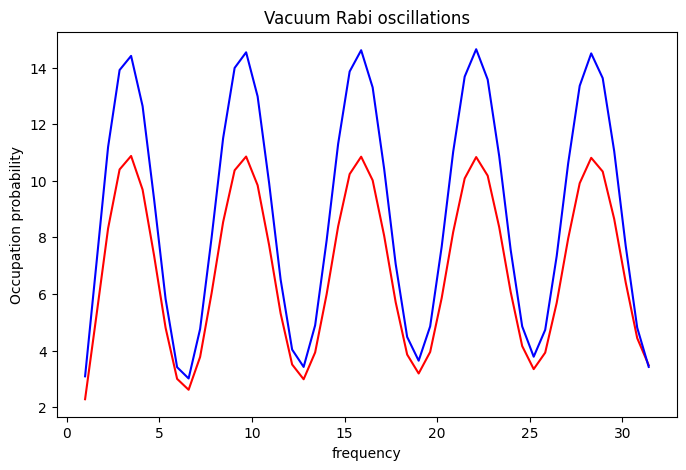

In [ ]:
#plot
g = n-1
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(omega_max, int_freq_ex, 'r')
ax.plot(omega_max, int_freq_biex, 'b')
#ax.plot(t_list, final_pulse[g], 'g')
#ax.set_xlim(0, 4)
#ax.set_ylim(0, 1)
ax.set_xlabel('frequency')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')

##Two Photon Cascade Example
Fisher et al.

[Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.  0.  0.5]
 [0.  0.  0. ]
 [0.5 0.  0. ]], <function pulse_shape at 0x7e15c0500430>]]


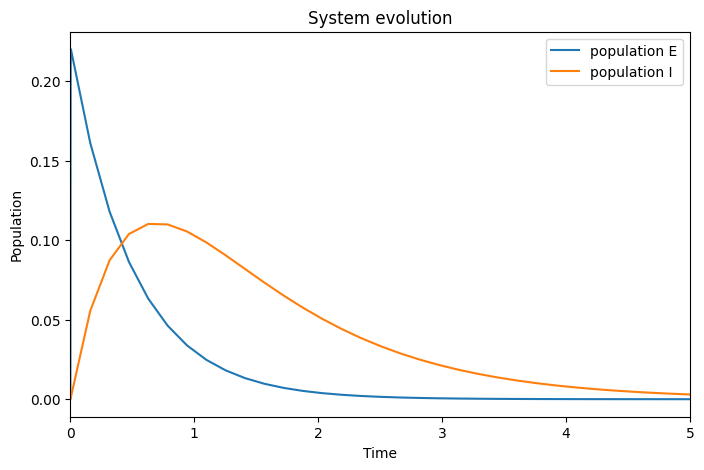

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# time parameters
gamma = 1                     # decay rate, sets the overall timescale of the system
globaldt = 0.15/gamma               # default time step
minpointsperpulse = 5.0             # minimum time resolution of a pulse

# define function E(t), a gaussian.
def pulse_shape(t, args):
    width = args['width']
    norm = args['norm']

    pulse_t_offset = 3.5
    t_offset = width*pulse_t_offset
    return norm * np.exp(-(t - t_offset) ** 2.0 /
                                  (2.0 * width ** 2.0))

# pulse normalization function
def pulsenormconst(args):
    args['norm'] = 1.0
    tlist = tlistfunc(args)
    unnorm_pulse = [pulse_shape(t, args) for t in tlist]
    unnorm_pulse_area = np.trapz(unnorm_pulse, tlist)
    return 1/unnorm_pulse_area

# in order to speed up the simulation for shorter pulses, we take advantage of
# QuTiP's built in support for variable time steps. This function generates a
# the list of times for which system dynamics will be calculated.
def tlistfunc(args):
    width = args['width']
    norm = args['norm']
    tmin = args['tmin']
    tmax = args['tmax']

    tlist = []

    pulse_t_offset = 3.5

    # if the global time resolution satisfies the minimum number of points per
    # pulse, make time list a simple linearly-spaced set of points.
    if width/minpointsperpulse > globaldt:
        tlist = np.linspace(tmin, tmax, int((tmax - tmin)/globaldt))

    # otherwise, increase resolution inside the pulse only.
    else:
        tlist1 = np.linspace(tmin, width*pulse_t_offset*2.0, \
                             int(minpointsperpulse*(pulse_t_offset*2.0 - tmin)))[:-1]
        tlist2 = np.linspace(width*pulse_t_offset*2.0, tmax, \
                             int((tmax - width*pulse_t_offset*2.0)/globaldt))
        tlist = np.append(tlist1, tlist2)

    return tlist

def prepare_pulse(width):
    pulseargs = {'width':width * gamma, 'tmin':0.0, 'tmax':width*1.5 + 5.0/gamma} # define pulse properties
    pulseargs['norm'] = pulse_area * pulsenormconst(pulseargs)    # compute numerically the normalization constant
    tlist = tlistfunc(pulseargs)                                  # generate time list
    pulse = [pulse_shape(t, pulseargs) for t in tlist]            # generate pulse shape
    return tlist, pulse, pulseargs

C = 1 # includes dipole coupling strength and binding energy

pulse_area = (np.pi/3)/(C**2) # setting area of pulse to Pi.

#System state space
g = fock(3,0)
i = fock(3,1)
e = fock(3,2)

# Hamiltonian
H0 = qeye(3)                          # identity because we are in the interaction picture
H_I = C/2 * (e*g.dag() + g*e.dag())  # time dependent field
H = [H0,[H_I, pulse_shape]]          # complete system Hamiltonian
print(H)

s1 = np.sqrt(2*gamma) * i*e.dag()     # lowering operator for channel 1
s2 = np.sqrt(gamma) * g*i.dag()       # lowering operator for channel 2

#prepare pulse (argument is pulse width)
tlist, pulse, pulseargs = prepare_pulse(0.001)

#compute system evolution and expectation values of projectors. Supply pulseargs as parameter for H(t).
result = mesolve(H, g, tlist, [s1, s2], [e*e.dag(), i*i.dag()], args=pulseargs)
e_expvals = result.expect[0]
i_expvals = result.expect[1]

#plot the data
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(tlist,e_expvals, label="population E")
ax.plot(tlist,i_expvals, label="population I")
#ax.plot([0,len(pulse)], pulse, label="population I")
ax.legend()
ax.set_xlabel('Time');
ax.set_ylabel('Population');
ax.set_xlim(0, 5)
ax.set_title('System evolution');

##Constant Dephasing Parameters

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import Options, qutrit_basis, dag, fock, about, basis, destroy, mesolve, qeye, sigmaz, tensor

#Parameters and Values
#scale factors
gamma_b = 1/771 #biexciton decay constant (THz)
gamma_x = 1/405 #exiton decay constant (THz)
gammax_deph = 1/119
gammab_deph = 1/211
gamma_I0 = 0.05 #Amplitude of intensity-dependent dephasing rate
n = 200
t_list = np.linspace(0, 40, n) #Lifetime of the simulation

#Frequency
omega_max = np.linspace(0, 10*np.pi, n) #Maximum intensity of the laser pulse
t_i = 0 #Centre of the Gaussian pulse (offset) (ns)
sigma = 12 #Pulse Length (ns)
C = 1 #dipole coupling strength and binding energy
omega_list = []
final_pulse = []

for freq in range(0,n):
  omega = np.exp(-(np.log(2)*((t_list-t_i)**2))/(sigma**2)) #Rabi frequency
  omega_list.append(omega)

for i in range(0,n):
  norm_val = 1/(np.trapz(omega_list[i], t_list))
  norm = norm_val*omega_max[i]
  normalized = (omega_list[i]*norm)
  final_pulse.append(normalized)

#Collapse Operators
#scale factors
n_p = 2
delta_x = 2*np.pi*0.335 #transition state-exciton seperation (THz)
delta_b = 0 #detuning due to laser

#System states
gnd = fock(3,0)
ex = fock(3,1)
biex = fock(3,2)

#Collapse Operators
L1 = (gamma_b/2)*(ex*biex.dag()) #biex-ex spontaneous decay
L2 = (gamma_x/2)*(gnd*ex.dag()) #ex-gnd spontaneous decay
L3 = gammax_deph*((biex*biex.dag())-(ex*ex.dag())) #biex-ex dephasing
L4 = gammab_deph*((ex*ex.dag())-(gnd*gnd.dag())) #ex-gnd dephasing

# for i in (range(0,n)):
#   omega_working = final_pulse[i]
#   holder3 = []
#   holder4 = []
#   for j in (range(0,n)):
#     coeff = ((gamma_I0*((omega_working[j]/omega_max[i])**n_p))/2)
#     val3 = coeff*((biex*biex.dag())-(ex*ex.dag())) #biex-ex dephasing
#     val4 = coeff*((ex*ex.dag())-(gnd*gnd.dag())) #ex-gnd dephasing
#     holder3.append(val3)
#     holder4.append(val4)
#   L3.append(holder3)
#   L4.append(holder4)

#Hamiltonian
H_list = []
for i in range(0,n):
  H0 = qeye(3)
  omega_working = final_pulse[i]
  holder = []
  H_I = (C/2)*(biex*gnd.dag() + gnd*biex.dag())
  H_list.append([H0, [H_I, omega_working]])

#Evolution
master_output_ex = []
master_output_biex = []

for val in range(0,n):
  H_working = H_list[val]
  # L3_working = L3[val]
  # L4_working = L4[val]
  holder_ex = []
  holder_biex = []

  output = mesolve(H_working, gnd, t_list, [L1,L2,L3,L4], [ex*ex.dag(),biex*biex.dag()])

  master_output_ex.append(output.expect[0])
  master_output_biex.append(output.expect[1])

int_freq_ex = []
int_freq_biex = []

for vals in range(0,n):
  integration_ex = gamma_x*np.trapz(master_output_ex[vals], t_list)
  integration_biex = gamma_b*np.trapz(master_output_biex[vals], t_list)

  int_freq_ex.append(integration_ex)
  int_freq_biex.append(integration_biex)

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

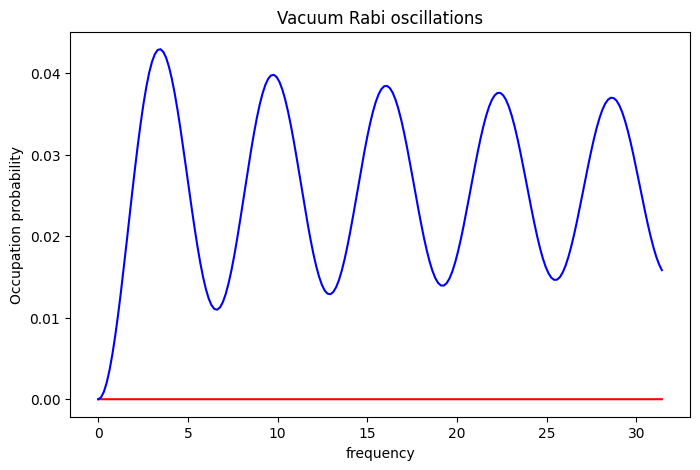

In [ ]:
#plot
g = n-1
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(omega_max, int_freq_ex, 'r')
ax.plot(omega_max, int_freq_biex, 'b')
#ax.plot(t_list, final_pulse[g], 'g')
#ax.set_xlim(0, 4)
#ax.set_ylim(0, 1)
ax.set_xlabel('frequency')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')